In [2]:
#==============================================================================
#=====     setting some configurations
#==============================================================================
import os
path = r'C:\Users\eight\Desktop\Kelvin HDD\3. Coursera\A. Projects\2. Credit Card Fraud Detection --- Kaggle'
os.chdir(path)
os.getcwd()

import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)


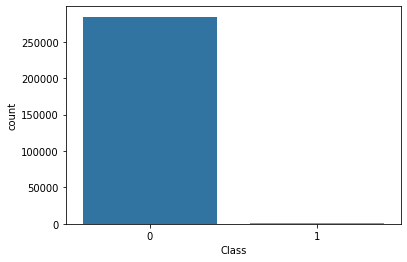

In [5]:
#==============================================================================
#=====     read in the anonymised credit card data
#==============================================================================
import pandas as pd
credit = pd.read_csv('creditcard.csv')
credit.head()

# since the data is related to fraud, we examine the proportion of the classes
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(credit.Class)
plt.show()
credit.Class.value_counts()

# define the feature columns and the target column
list(credit)
X = credit.iloc[:,:-1]; y = credit.iloc[:,-1]

Shape of the X_train dataset:  (227845, 30)
Shape of the y_train dataset:  (227845,)
Shape of the X_test dataset:  (56962, 30)
Shape of the y_test dataset:  (56962,)
Before OverSampling, counts of label '1': 391
Before OverSampling, counts of label '0': 227454 

Shape of the X_train dataset after over-sampling:  (454908, 30)
Shape of the y_train dataset after over-sampling:  (454908,)
Before OverSampling, counts of label '1': 227454
Before OverSampling, counts of label '0': 227454 



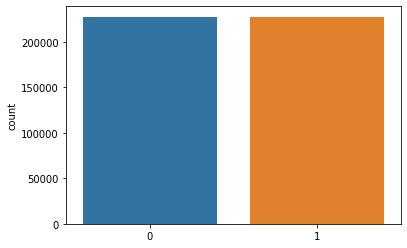

In [7]:
#==============================================================================
#=====     apply SMOTE technique to over-sample the minority class
#==============================================================================
# note that we perform the oversampling before doing cross-validation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# take a look at the shape of the datasets before application of SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Shape of the X_train dataset: ", X_train.shape)
print("Shape of the y_train dataset: ", y_train.shape)
print("Shape of the X_test dataset: ", X_test.shape)
print("Shape of the y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# we now implement the SMOTE technique
# note that we need to ensure that "y_train" is continuous; so we use the "ravel" method to do that
smote = SMOTE(random_state = 0)
X_train_oversample, y_train_oversample = smote.fit_sample(X_train, y_train.ravel())
print("Shape of the X_train dataset after over-sampling: ", X_train_oversample.shape)
print("Shape of the y_train dataset after over-sampling: ", y_train_oversample.shape)

# we now have a balanced dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_oversample == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_oversample == 0)))

import seaborn as sns
sns.countplot(y_train_oversample)

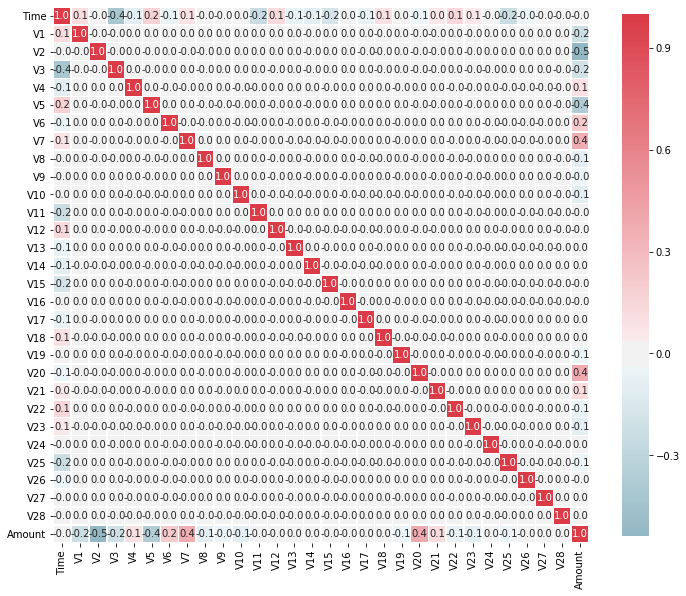

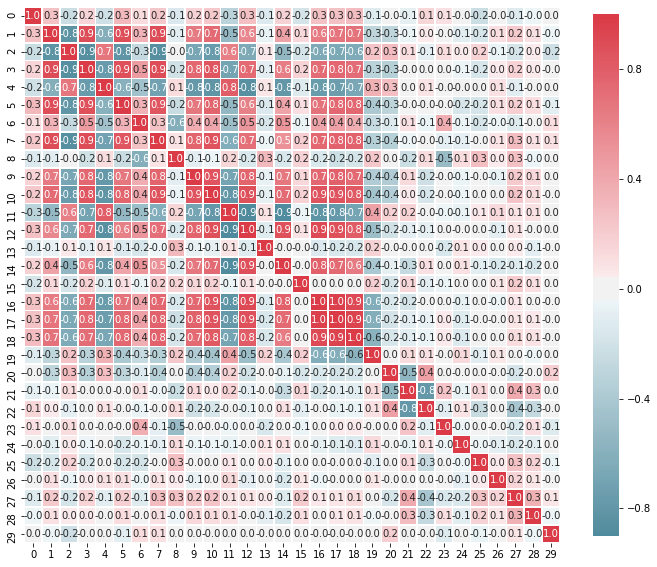

In [8]:
#==============================================================================
#=====     create some visualisations
#==============================================================================
# create the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def corr_heatmap(arr):
	df = pd.DataFrame(arr)
	correlations = df.corr()
	cmap = sns.diverging_palette(220, 10, as_cmap = True)
	fig, ax = plt.subplots(figsize = (12,12))
	sns.heatmap(correlations, cmap = cmap, vmax = 1.0, 
			    center = 0, fmt = '.1f', square = True,
				linewidth = 0.5, annot = True, cbar_kws = {"shrink": .80})

	plt.show()

# we can see that after performing the over-sampling, that we see more correlations
corr_heatmap(X_train)
corr_heatmap(X_train_oversample)




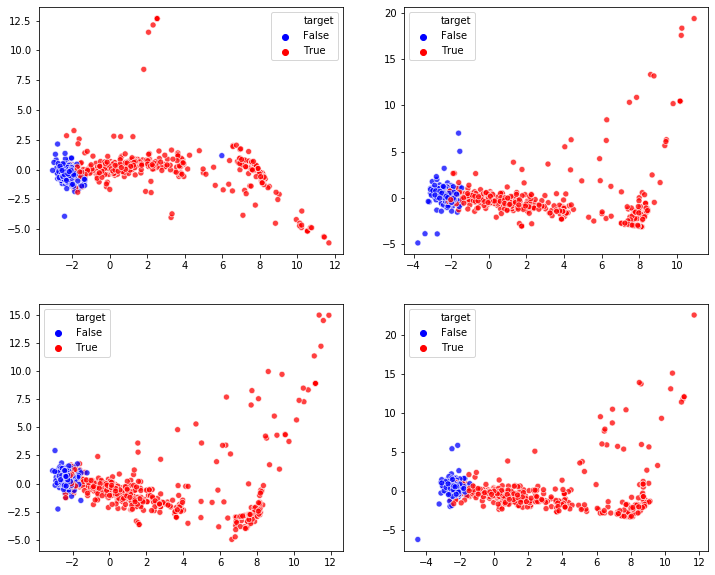

In [9]:
#==============================================================================
#=====     clustering by PCA
#==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# select random four groups of 1000 samples each
y_df = pd.DataFrame(y_train_oversample)
y_df.rename({0: 'target'}, axis = 1, inplace = True)
X_df = pd.DataFrame(X_train_oversample)

# sample group 1
y_sample1 = y_df.sample(n = 1000, random_state = 0)
y_sample1.index
X_sample1 = X_df.iloc[y_sample1.index]

# sample group 2
y_sample2 = y_df.sample(n = 1000, random_state = 1)
y_sample2.index
X_sample2 = X_df.iloc[y_sample2.index]

# sample group 3
y_sample3 = y_df.sample(n = 1000, random_state = 2)
y_sample3.index
X_sample3 = X_df.iloc[y_sample3.index]

# sample group 4
y_sample4 = y_df.sample(n = 1000, random_state = 3)
y_sample4.index
X_sample4 = X_df.iloc[y_sample4.index]

# before applying PCA, each feature should be centered (zero mean) and with unit variance
# sample group 1
X_norm1 = StandardScaler().fit_transform(X_sample1)
X_pca1 = PCA(n_components = 2, random_state = 0).fit_transform(pd.DataFrame(X_norm1).values)

# sample group 2
X_norm2 = StandardScaler().fit_transform(X_sample2)
X_pca2 = PCA(n_components = 2, random_state = 0).fit_transform(pd.DataFrame(X_norm2).values)

# sample group 3
X_norm3 = StandardScaler().fit_transform(X_sample3)
X_pca3 = PCA(n_components = 2, random_state = 0).fit_transform(pd.DataFrame(X_norm3).values)

# sample group 4
X_norm4 = StandardScaler().fit_transform(X_sample4)
X_pca4 = PCA(n_components = 2, random_state = 0).fit_transform(pd.DataFrame(X_norm4).values)

# doing a PCA scatter plot
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize = (12,10))
sns.scatterplot(x = X_pca1[:,0], y = X_pca1[:,1], hue = (y_sample1.target == 1), 
					palette = ['blue', 'red'], alpha = 0.75, ax = ax[0,0])

sns.scatterplot(x = X_pca2[:,0], y = X_pca2[:,1], hue = (y_sample2.target == 1), 
					palette = ['blue', 'red'], alpha = 0.75, ax = ax[0,1])

sns.scatterplot(x = X_pca3[:,0], y = X_pca3[:,1], hue = (y_sample3.target == 1), 
					palette = ['blue', 'red'], alpha = 0.75, ax = ax[1,0])

sns.scatterplot(x = X_pca4[:,0], y = X_pca4[:,1], hue = (y_sample4.target == 1), 
					palette = ['blue', 'red'], alpha = 0.75, ax = ax[1,1])
plt.show()

In [10]:
#==============================================================================
#=====     we scale the variables to prevent overfitting
#==============================================================================
# initialise the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler().fit(X_train_oversample[:,(0,-1)])

# create dataframes for both train and test
import pandas as pd
X_df_train = pd.DataFrame(X_train_oversample)
X_df_test  = pd.DataFrame(X_test)

# proceed to scale the data
X_df_train.iloc[:,[0,-1]] = mm_scaler.transform(X_df_train.iloc[:,[0,-1]])
X_df_test.iloc[:,[0,-1]]  = mm_scaler.transform(X_df_test.iloc[:,[0,-1]])

# convert back to numpy arrays
import numpy as np
X_mmscaled_train = np.asarray(X_df_train)
X_mmscaled_test  = np.asarray(X_df_test)

In [ ]:
#==============================================================================
#=====     we perform some predictions using four classifiers
#==============================================================================
#===   load in the packages for the machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#===   create the logistic regression classifier 
clf_logreg = LogisticRegression(class_weight = {0:1,1:10}).fit(X_mmscaled_train, y_train_oversample)
logreg_pred = clf_logreg.predict(X_mmscaled_test)
clf_logreg.get_params

#===   create the Support Vector Classifier 
clf_SVC = SVC(kernel = 'linear', class_weight = {0:1,1:10}).fit(X_mmscaled_train, y_train_oversample)
SVC_pred = clf_SVC.predict(X_mmscaled_test)
clf_SVC.get_params

#===   create the RandomForest Classifier 
clf_rf = RandomForestClassifier(n_estimators = 100, class_weight = {0:1,1:10}).fit(X_mmscaled_train, y_train_oversample)
rf_pred = clf_rf.predict(X_mmscaled_test)
clf_rf.get_params

#===   create the AdaBoost Classifier 
clf_ada = AdaBoostClassifier(n_estimators = 100).fit(X_mmscaled_train, y_train_oversample)
ada_pred = clf_ada.predict(X_mmscaled_test)
clf_ada.get_params

In [ ]:
#==============================================================================
#=====     we calculate some metric scores
#==============================================================================
#===   we will use the classification report function to return the scores e.g. precision, recall,
#===   in this case "recall" is most important because we want to penalise on false negatives as well
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

#===   calculate scores for logistic regression classifier 
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred)))

#===   calculate scores for Support Vector Classifier 
print("The confusion matrix for SVC:\n {}\n".format(confusion_matrix(y_test, SVC_pred)))
print("The AUC score from SVC is: {}\n".format(roc_auc_score(y_test, SVC_pred)))
print("The classification report from SVC is:\n {} \n\n".format(classification_report(y_test, SVC_pred)))

#===   calculate scores for RandomForest Classifier 
print("The confusion matrix for RandomForest Classifier:\n {}\n".format(confusion_matrix(y_test, rf_pred)))
print("The AUC score from Random Forest is: {}\n".format(roc_auc_score(y_test, rf_pred)))
print("The classification report from Random Forest is\n: {}\n\n".format(classification_report(y_test, rf_pred)))

#===   calculate scores for AdaBoost Classifier
print("The confusion matrix for AdaBoost Classifier:\n {}\n".format(confusion_matrix(y_test, ada_pred)))
print("The AUC score from AdaBoost is: {}\n".format(roc_auc_score(y_test, ada_pred)))
print("The classification report from AdaBoost is\n: {}\n\n".format(classification_report(y_test, ada_pred)))

In [ ]:
#==============================================================================
#=====     we plot the ROC curves
#==============================================================================
from sklearn.metrics import roc_curve, auc

#===   for logistic regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_pred)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#===   for SVC
fpr_SVC, tpr_SVC, _ = roc_curve(y_test, SVC_pred)
roc_auc_SVC= auc(fpr_SVC, tpr_SVC)

#===   for random forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#===   for ada boost
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_pred)
roc_auc_ada= auc(fpr_ada, tpr_ada)

#===   now we plot the ROC curves
import matplotlib.pyplot as plt

#===   ROC curves for logistic regression
plt.figure(figsize = (12,10))
plt.plot(fpr_logreg, tpr_logreg, lw = 3, label = "LogisticRegression ROC curve (area = {:0.2f})".format(roc_auc_logreg))
plt.plot([0,1], [0,1], color = "navy", lw = 3, linestyle = "--")
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)

#===   ROC curves for SVC
plt.figure(figsize = (12,10))
plt.plot(fpr_SVC, tpr_SVC, lw = 3, label = "SVC ROC curve (area = {:0.2f})".format(roc_auc_SVC))
plt.plot([0,1], [0,1], color = "navy", lw = 3, linestyle = "--")
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)

#===   ROC curves for RandomForest
plt.figure(figsize = (12,10))
plt.plot(fpr_rf, tpr_rf, lw = 3, label = "RandomForest ROC curve (area = {:0.2f})".format(roc_auc_rf))
plt.plot([0,1], [0,1], color = "navy", lw = 3, linestyle = "--")
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)

#===   ROC curves for AdaBoost
plt.figure(figsize = (12,10))
plt.plot(fpr_ada, tpr_ada, lw = 3, label = "AdaBoost ROC curve (area = {:0.2f})".format(roc_auc_ada))
plt.plot([0,1], [0,1], color = "navy", lw = 3, linestyle = "--")
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)


In [ ]:
#==============================================================================
#=====     we plot the precision-recall curves
#==============================================================================
from sklearn.metrics import precision_recall_curve

#===   precision-recall curves for Logistic Regression
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, logreg_pred)
plt.figure(figsize = (10,8))
plt.plot(precision_logreg, recall_logreg)
plt.title('Precision-Recall Curve (Logistic Regression)', fontsize = 18)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')

#===   precision-recall curves for SVC
precision_SVC, recall_SVC, thresholds_SVC = precision_recall_curve(y_test, SVC_pred)
plt.figure(figsize = (10,8))
plt.plot(precision_SVC, recall_SVC)
plt.title('Precision-Recall Curve (SVC)', fontsize = 18)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')

#===   precision-recall curves for RandomForest Classifier
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_pred)
plt.figure(figsize = (10,8))
plt.plot(precision_rf, recall_rf)
plt.title('Precision-Recall Curve (RandomForest)', fontsize = 18)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')

#===   precision-recall curves for AdaBoost Classifier
precision_ada, recall_ada, thresholds_ada = precision_recall_curve(y_test, ada_pred)
plt.figure(figsize = (10,8))
plt.plot(precision_ada, recall_ada)
plt.title('Precision-Recall Curve (AdaBoost)', fontsize = 18)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')


In [ ]:
#==============================================================================
#=====     we perform grid search just for the best model for recall score
#==============================================================================
from sklearn.model_selection import GridSearchCV

# we attempt to improve the logistic regression model using grid search CV
logreg_param = {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logreg = GridSearchCV(LogisticRegression(), logreg_param)
grid_logreg.fit(X_mmscaled_train, y_train_oversample)
logreg_estimator = grid_logreg.best_estimator_
grid_logreg.best_params_


#clf_logreg = LogisticRegression().fit(X_mmscaled_train, y_train_oversample)
logreg_pred_grid = logreg_estimator.predict(X_mmscaled_test)

#===   calculate scores for logistic regression classifier 
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred_grid)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred_grid)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred_grid)))

#===   create the logistic regression classifier 
clf_logreg_tuned = LogisticRegression(penalty = 'l1', C = 1000, class_weight = {0: 1, 1:10}).fit(X_mmscaled_train, y_train_oversample)
logreg_pred_tuned = clf_logreg_tuned.predict(X_mmscaled_test)
clf_logreg_tuned.get_params

#===   calculate scores for logistic regression classifier 
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred_tuned)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred_tuned)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred_tuned)))



In [ ]:
#==============================================================================
#=====     CONCLUSION
#==============================================================================

# unfortunately, we have not gotten much improvements in the accuracy scores (we hid the codes)
# we noticed that the more trees we used, the worse the model performed
# we will use the default settings as earlier configured, but add on the other parameters we got from grid search cv

clf_rf_tuned = RandomForestClassifier(n_estimators = 100, max_depth = 8, class_weight = {0:1, 1:10}).fit(X_mmscaled_train, y_train_oversample)
rf_pred_tuned = clf_rf_tuned.predict(X_mmscaled_test)
clf_rf_tuned.get_params

#===   we recap all the computation results for random forest and logistic regression
#===   calculate scores for RandomForest Classifier [OPTION 2]
print("The confusion matrix for RandomForest Classifier:\n {}\n".format(confusion_matrix(y_test, rf_pred)))
print("The AUC score from Random Forest is: {}\n".format(roc_auc_score(y_test, rf_pred)))
print("The classification report from Random Forest is\n: {}\n\n".format(classification_report(y_test, rf_pred)))
clf_rf.get_params
#----- this model is well-balanced, and with decent AUC score

#===   compute the scores for random forest
print("The confusion matrix for RandomForest Classifier:\n {}\n".format(confusion_matrix(y_test, rf_pred_tuned)))
print("The AUC score from Random Forest is: {}\n".format(roc_auc_score(y_test, rf_pred_tuned)))
print("The classification report from Random Forest is\n: {}\n\n".format(classification_report(y_test, rf_pred_tuned)))
#----- this model is not at all well-balanced, and with good AUC score and recall scores

#===   calculate scores for logistic regression classifier (from the basic prediction)
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred)))
#----- this model is not at all well-balanced, and with excellent AUC score and recall scores

#===   calculate scores for logistic regression classifier (from grid search CV) [OPTION 1]
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred_grid)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred_grid)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred_grid)))
grid_logreg.best_params_
#----- this model is not at all well-balanced, and with excellent AUC score and recall scores; the recall score is compromised for the improved balance

#===   calculate scores for logistic regression classifier (from tuning, after seeing results from grid search cv)
print("The confusion matrix for Logistic Regression:\n {}".format(confusion_matrix(y_test, logreg_pred_tuned)))
print("The AUC score from Logistic Regression is: {}\n".format(roc_auc_score(y_test, logreg_pred_tuned)))
print("The classification report from Logistic Regression is:\n {}\n\n".format(classification_report(y_test, logreg_pred_tuned)))
#----- this model is not at all well-balanced, and with excellent AUC score and recall scores; the recall score is compromised, but poor precision

